# Analysis - 4
## - Team Based Analysis
#### 1. Team wins in different cities 
#### 2. Teams which can handle Pressure
#### 3. Team wins by Big Margin

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [52]:
path=os.getcwd()
path

'C:\\PYTHON\\desai_manav_spring2017\\Final'

In [53]:
path=path+'\\Original_Data\\'
path

'C:\\PYTHON\\desai_manav_spring2017\\Final\\Original_Data\\'

In [54]:
df_matches= pd.read_csv(path + "matches.csv")
df_deliveries= pd.read_csv(path + "deliveries.csv")

In [55]:
df_all_matches_score = df_deliveries.groupby([df_deliveries['match_id'],
           df_deliveries['inning']])['total_runs'].sum().unstack().reset_index()
df_all_matches_score = df_deliveries.groupby([df_deliveries['match_id'],df_deliveries['inning']])['total_runs'].sum().unstack().reset_index()
df_all_matches_score.columns = ['match_id','Team1_score','Team2_score','Team1_superover_score','Team2_superover_score']
df_all_matches_score.unstack().reset_index().head()

,level_0,level_1,0
0,match_id,0,1.0
1,match_id,1,2.0
2,match_id,2,3.0
3,match_id,3,4.0
4,match_id,4,5.0


In [56]:
#Calculating the aggregates of a match

df_aggregates = pd.merge(df_matches, df_all_matches_score, left_on='id', right_on= 'match_id', how='outer')
df_aggregates.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,222.0,82.0,NaN,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,240.0,207.0,NaN,NaN


## 1. Team wins in different cities

In [57]:
df_total_wins_per_city = df_aggregates[df_aggregates['season'] == 2008].groupby(['winner','city'])['match_id'].count().unstack()
df_total_wins_per_city.head(10)

city,Bangalore,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai
winner,,,,,,,,
Chennai Super Kings,1.0,1.0,3.0,1.0,1.0,NaN,1.0,1.0
Deccan Chargers,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
Delhi Daredevils,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN
Kings XI Punjab,1.0,6.0,NaN,1.0,1.0,NaN,NaN,1.0
Kolkata Knight Riders,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN
Mumbai Indians,1.0,NaN,NaN,NaN,1.0,NaN,1.0,4.0
Rajasthan Royals,1.0,NaN,1.0,NaN,1.0,7.0,1.0,2.0
Royal Challengers Bangalore,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0


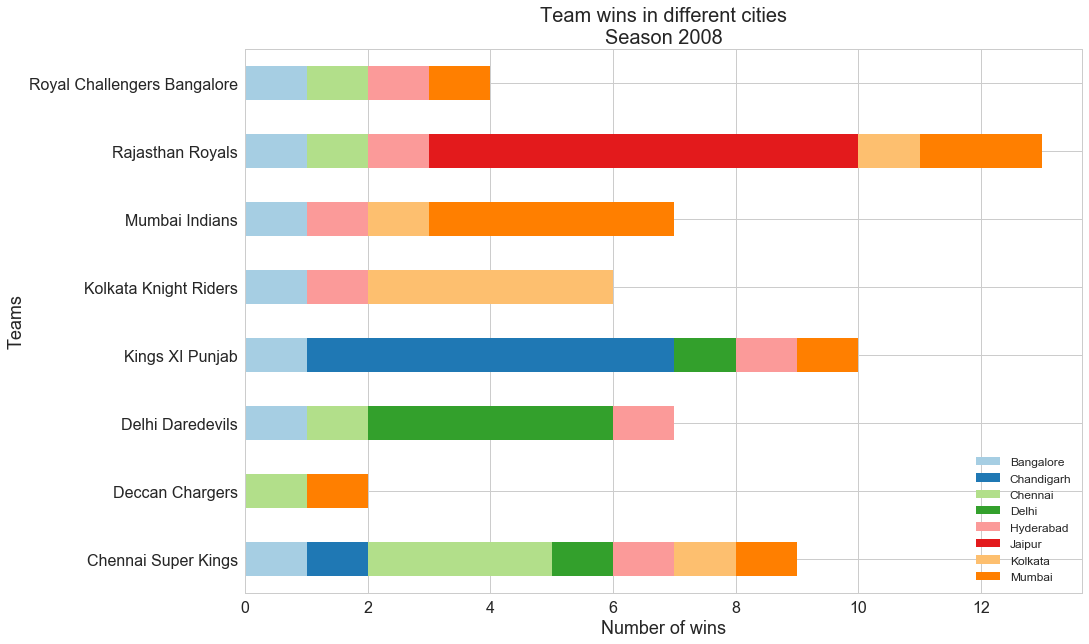

In [58]:
x, y = 2008,2009

while x<y:
    df_total_wins_per_city = df_aggregates[df_aggregates['season'] == x].groupby(['winner', 'city'])['match_id'].count().unstack()
    plot = df_total_wins_per_city.plot(kind='barh', stacked=True, figsize=(15, 10), fontsize=16)
    sns.set_palette("Paired", len(df_aggregates['city'].unique()))
    plot.set_title("Team wins in different cities\nSeason "+str(x) , fontsize=20)
    plot.set_xlabel("Number of wins", fontsize=18)
    plot.set_ylabel("Teams",fontsize=18)
    plot.legend(loc='best', prop={'size':12})
    x +=1

### Conclusion
##### ~ Rajasthan Royals have won the most number of matches
##### ~ Deccan Chargers have won the least number of matches
##### ~ All the teams have won the most on their Home Grounds
##### ~ Royal Challengers Bangalore doesn't seem to be affected with their Home city. They have nearly equal number of wins in every city

# 2. Teams which can handle pressure

In [59]:
df_close = df_matches[((df_matches['win_by_runs']<10) & (df_matches['win_by_runs']>0)) 
                                  | ((df_matches['win_by_wickets']<=2) & (df_matches['win_by_wickets']>0))]
df_close.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
21,22,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
28,29,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
40,41,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
43,44,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN


In [60]:
df_close.groupby("winner")["id"].count()

winner
Chennai Super Kings             6
Deccan Chargers                 3
Delhi Daredevils                3
Gujarat Lions                   1
Kings XI Punjab                10
Kochi Tuskers Kerala            1
Kolkata Knight Riders           7
Mumbai Indians                  9
Pune Warriors                   1
Rajasthan Royals                4
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
Name: id, dtype: int64

C:\Users\Manav Desai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


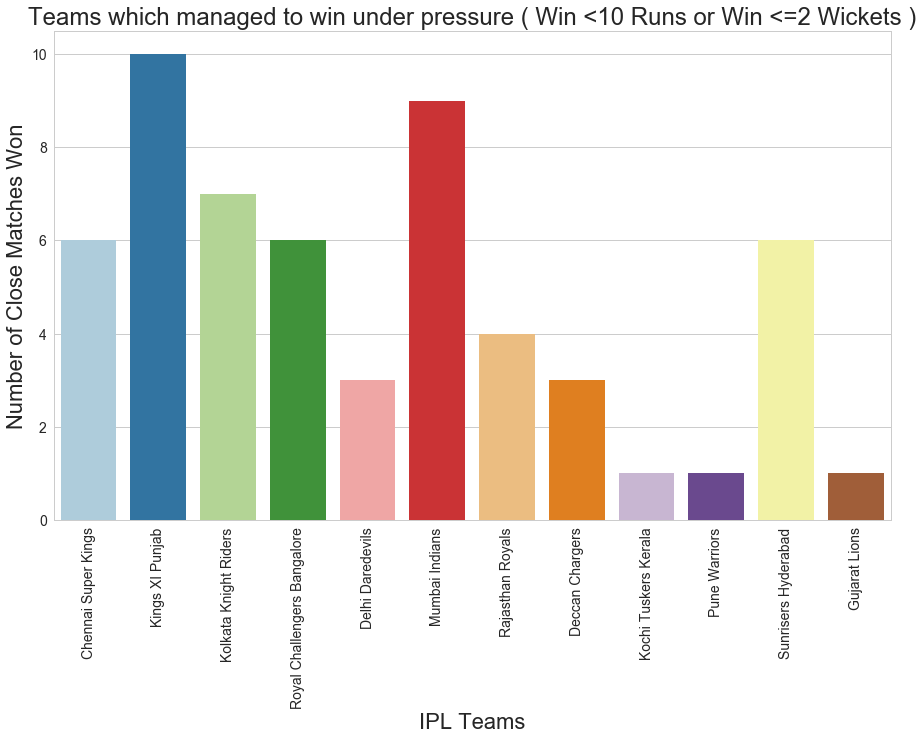

In [61]:
plt.subplots(figsize=(15,9))
sns.set_style("whitegrid")
top = sns.countplot(x='winner', data=df_close)
top.set_title("Teams which managed to win under pressure ( Win <10 Runs or Win <=2 Wickets )")
plt.setp(top.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
top.set_xlabel("IPL Teams")
top.set_ylabel("Number of Close Matches Won")
top.legend(fontsize= 18, loc="best")
top.xaxis.get_label().set_fontsize(22)
top.yaxis.get_label().set_fontsize(22)
top.title.set_fontsize(24)
plt.xticks(rotation='vertical')
top.tick_params(axis='x', which='major',labelsize=14)
top.tick_params(axis='y', which='major',labelsize=14)

### Conclusion
##### ~ Kings XI Punjab have handled their nerves in Pressure and won the games maximum number of times when the margin was less
##### ~ Pune Warriors, Kochi Tuskers Kerala and Gujarat Lions doesn't seem to handle pressure easily

# 3. Team wins by Big Margin

In [62]:
df_big_margin = df_matches[((df_matches['win_by_runs']>=50) | (df_matches['win_by_wickets']>=7))]
df_big_margin.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN


In [63]:
df_big_margin.groupby("winner")["id"].count()

winner
Chennai Super Kings            27
Deccan Chargers                 7
Delhi Daredevils               20
Gujarat Lions                   1
Kings XI Punjab                18
Kochi Tuskers Kerala            4
Kolkata Knight Riders          20
Mumbai Indians                 25
Pune Warriors                   3
Rajasthan Royals               23
Rising Pune Supergiants         2
Royal Challengers Bangalore    29
Sunrisers Hyderabad             8
Name: id, dtype: int64

C:\Users\Manav Desai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


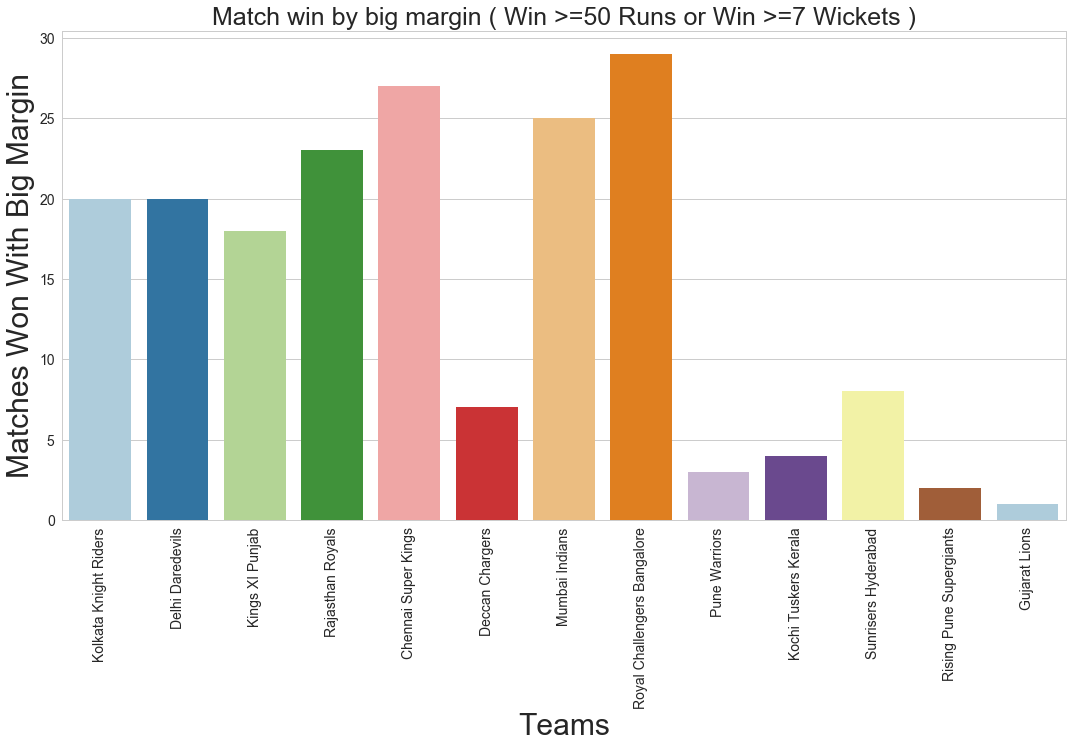

In [64]:
plt.subplots(figsize=(18,9))
sns.set_style("whitegrid")
top = sns.countplot(x='winner', data=df_big_margin)
top.set_title("Match win by big margin ( Win >=50 Runs or Win >=7 Wickets )")
plt.setp(top.xaxis.get_majorticklabels(),rotation=45)
top.set_xlabel("Teams")
top.set_ylabel("Matches Won With Big Margin")
top.legend(fontsize= 18, loc="best")
top.xaxis.get_label().set_fontsize(30)
top.yaxis.get_label().set_fontsize(30)
top.title.set_fontsize(25)
plt.xticks(rotation='vertical')
top.tick_params(axis='x', which='major',labelsize=14)
top.tick_params(axis='y', which='major',labelsize=14)

### Conclusion
##### ~ Royal Challengers Bangalore and Chennai Super Kings have won the matches with sheer dominance.
